# Book Recommendation System: Collaborative Filtering

## Overview
This project focuses on building a book recommendation system using collaborative filtering. Collaborative filtering is a technique used in recommendation systems to predict user preferences by collecting preferences from many users. The goal is to recommend books to users based on their past interactions and similarities with other users.

## Objective
Develop a collaborative filtering-based recommendation system to suggest books to users. The project will cover the complete pipeline, including data loading, exploratory data analysis, data preparation, model building, evaluation, and visualization.

## Learning Outcomes
1. Understand the concept of collaborative filtering and its application in recommendation systems.
2. Learn to preprocess and analyze user-item interaction data.
3. Gain experience in building a user-item matrix and computing user similarities.
4. Implement a recommendation system using cosine similarity.
5. Evaluate the recommendation system using metrics like Mean Squared Error (MSE).
6. Visualize user similarities and analyze the most recommended books.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. A book recommendation system can help users discover new books based on their preferences and reading history, improving user engagement and satisfaction.

### Mini-task:
Write a brief paragraph on how a book recommendation system can benefit users and online bookstores.

---

A well-built book recommendation system isn’t just a nice-to-have — it’s a quiet bridge between readers and stories they never knew they needed. For users, it makes discovery feel personal, almost like being seen. For online bookstores, it’s an opportunity to guide interest, deepen engagement, and gently increase sales — not by pushing, but by suggesting what genuinely fits. When done right, it serves both sides with a touch of thoughtfulness.

## Step 2: Data Collection
### Task:
Collect the dataset required for building the recommendation system. The dataset used in this project includes two files: `ratings.csv` and `books.csv`.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

# Display the first 10 rows of each dataset
### YOUR CODE HERE ###
```

---

In [ ]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the dataset using kagglehub
# Assuming the dataset is 'zygmunt/goodbooks-10k'
ratings = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv"
)

books = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "books.csv"
)

# Display the first 10 rows of each dataset
### YOUR CODE HERE ###
print("First 10 rows of ratings_df:")
display(ratings.head(10))

print("\nFirst 10 rows of books_df:")
display(books.head(10))

/tmp/ipython-input-17-511089176.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  ratings = kagglehub.load_dataset(
/tmp/ipython-input-17-511089176.py:13: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  books = kagglehub.load_dataset(


First 10 rows of ratings_df:


,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
5,1,2077,4
6,1,2487,4
7,1,2900,5
8,1,3662,4
9,1,3922,5



First 10 rows of books_df:


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


In [ ]:
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of book ratings, identify popular books, and explore user behavior.

### Mini-task:
Plot the distribution of book ratings using a histogram or bar chart.

#### Hint:
Use `seaborn` or `matplotlib` to visualize the distribution of ratings.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings
### YOUR CODE HERE ###
```

---

/tmp/ipython-input-21-3344336948.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings_df, palette='viridis') # Using a color palette


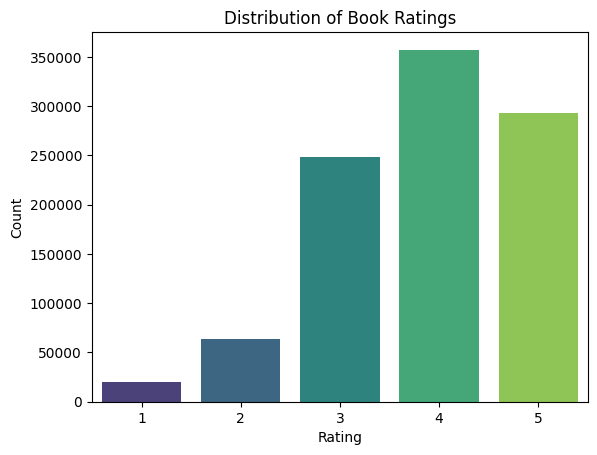

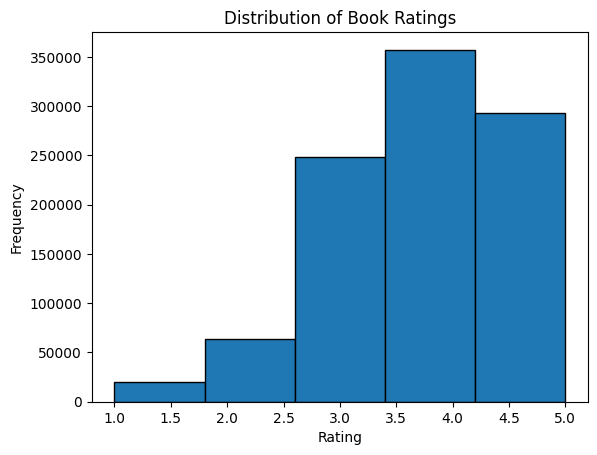

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings

# Assuming your ratings are in a pandas Series or DataFrame column named 'rating'
sns.countplot(x='rating', data=ratings_df, palette='viridis') # Using a color palette
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

import matplotlib.pyplot as plt

# Assuming your ratings are in a pandas Series or DataFrame column named 'rating'
plt.hist(ratings_df['rating'], bins=5, edgecolor='black') # You can adjust the number of bins
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Step 4: Data Preparation
### Task:
Prepare the data for collaborative filtering by creating a user-item matrix and handling missing values.

### Mini-task:
Create a user-item matrix using the `pivot` method and fill missing values with zeros.

#### Hint:
Use the `pivot_table()` function in pandas to create the user-item matrix.

```python
# Create a user-item matrix
### YOUR CODE HERE ###
```

---

In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load ratings.csv
ratings_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv"
)

# Load books.csv
books_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "books.csv"
)

# print("First 5 records of ratings.csv:", ratings_df.head())
# print("First 5 records of books.csv:", books_df.head())

# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd # Import pandas
from IPython.display import display # Import display

# Load the latest version of the datasets
ratings = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv"
)

books = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "books.csv"
)

# --- Reduce Dataset Size ---

# Define the percentage of users to sample (e.g., 10%)
sample_percentage = 0.1

# Get a list of unique user IDs
unique_user_ids = ratings['user_id'].unique()

# Sample a subset of user IDs
sampled_user_ids = pd.Series(unique_user_ids).sample(frac=sample_percentage, random_state=42) # random_state for reproducibility

# Filter the ratings DataFrame to keep only ratings from the sampled users
ratings_reduced = ratings[ratings['user_id'].isin(sampled_user_ids)]

# Get the book IDs that are present in the reduced ratings DataFrame
books_in_reduced_ratings = ratings_reduced['book_id'].unique()

# Filter the books DataFrame to keep only books that were rated by the sampled users
books_reduced = books[books['book_id'].isin(books_in_reduced_ratings)]

print(f"Original ratings size: {ratings.shape[0]}")
print(f"Reduced ratings size: {ratings_reduced.shape[0]}")
print(f"Original books size: {books.shape[0]}")
print(f"Reduced books size: {books_reduced.shape[0]}")

# Now you can work with ratings_reduced and books_reduced for faster processing
# Display the first 10 rows of each reduced dataset
print("\nFirst 10 rows of reduced ratings_df:")
display(ratings_reduced.head(10))

print("\nFirst 10 rows of reduced books_df:")
display(books_reduced.head(10))

# You should now use ratings_reduced and books_reduced in the subsequent steps
# For example, when creating the user-item matrix:
# user_item_matrix = ratings_reduced.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)

/tmp/ipython-input-13-2051137675.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  ratings_df = kagglehub.load_dataset(
/tmp/ipython-input-13-2051137675.py:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  books_df = kagglehub.load_dataset(


/tmp/ipython-input-13-2051137675.py:31: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  ratings = kagglehub.load_dataset(
/tmp/ipython-input-13-2051137675.py:37: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  books = kagglehub.load_dataset(


Original ratings size: 981756
Reduced ratings size: 97141
Original books size: 10000
Reduced books size: 812

First 10 rows of reduced ratings_df:


,book_id,user_id,rating
4,1,1185,4
6,1,2487,4
40,1,21487,4
41,1,21713,5
62,1,32055,4
80,1,42404,5
107,2,6063,1
115,2,10509,2
117,2,10751,3
122,2,11692,3



First 10 rows of reduced books_df:


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...
12,13,5470,5470,153313,995,451524934,9.780452e+12,"George Orwell, Erich Fromm, Celâl Üster",1949.0,Nineteen Eighty-Four,...,1956832,2053394,45518,41845,86425,324874,692021,908229,https://images.gr-assets.com/books/1348990566m...,https://images.gr-assets.com/books/1348990566s...
13,14,7613,7613,2207778,896,452284244,9.780452e+12,George Orwell,1945.0,Animal Farm: A Fairy Story,...,1881700,1982987,35472,66854,135147,433432,698642,648912,https://images.gr-assets.com/books/1424037542m...,https://images.gr-assets.com/books/1424037542s...
17,18,5,5,2402163,376,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,...,1832823,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...


## Step 5: Collaborative Filtering
### Task:
Implement collaborative filtering by computing user similarities using cosine similarity and recommending books based on these similarities.

### Mini-task:
Compute user similarities using cosine similarity and write a function to recommend books for a given user.

#### Hint:
Use `cosine_similarity` from `sklearn.metrics.pairwise` to compute user similarities.

```python
from sklearn.metrics.pairwise import cosine_similarity

# Compute user similarities
### YOUR CODE HERE ###

# Write a function to recommend books for a given user
### YOUR CODE HERE ###
```

---

In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd # Import pandas
from IPython.display import display # Import display
from sklearn.metrics.pairwise import cosine_similarity

# Load the latest version of the datasets (ensure these are loaded before use)
ratings = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv"
)

books = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "books.csv"
)

# --- Reduce Dataset Size ---
# Define the percentage of users to sample (e.g., 10%)
sample_percentage = 0.1

# Get a list of unique user IDs
unique_user_ids = ratings['user_id'].unique()

# Sample a subset of user IDs
sampled_user_ids = pd.Series(unique_user_ids).sample(frac=sample_percentage, random_state=42) # random_state for reproducibility

# Filter the ratings DataFrame to keep only ratings from the sampled users
ratings_reduced = ratings[ratings['user_id'].isin(sampled_user_ids)]

# Get the book IDs that are present in the reduced ratings DataFrame
books_in_reduced_ratings = ratings_reduced['book_id'].unique()

# Filter the books DataFrame to keep only books that were rated by the sampled users
books_reduced = books[books['book_id'].isin(books_in_reduced_ratings)]

# Create a user-item matrix using the reduced dataset
# Use ratings_reduced instead of ratings_df
user_item_matrix = ratings_reduced.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)

# Compute user similarities
user_similarity = cosine_similarity(user_item_matrix)

# Convert the similarity matrix to a DataFrame for easier handling
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

def recommend_books_for_user(user_id, num_recommendations=5):
    """
    Recommends books for a given user based on user similarity.

    Args:
        user_id (int): The ID of the user for whom to recommend books.
        num_recommendations (int): The number of books to recommend.

    Returns:
        pandas.DataFrame: A DataFrame containing the recommended book titles.
    """
    # Check if the user_id exists in the user_item_matrix index
    if user_id not in user_similarity_df.index:
        print(f"User ID {user_id} not found in the dataset.")
        return pd.DataFrame()

    # Get the index of the user in the similarity matrix
    user_index = user_similarity_df.index.get_loc(user_id)

    # Get the similarity scores for the user
    user_similarities = user_similarity_df.iloc[user_index]

    # Sort users by similarity in descending order, excluding the user themselves
    similar_users = user_similarities.sort_values(ascending=False)[1:]

    # Get the books the target user has not rated (using the reduced matrix)
    user_rated_books = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    all_book_ids = user_item_matrix.columns
    unrated_books = all_book_ids.difference(user_rated_books)

    # Initialize a dictionary to store potential recommendations and their scores
    recommendation_scores = {}

    # Iterate through similar users
    for similar_user, similarity_score in similar_users.items():
        if similarity_score > 0: # Consider users with positive similarity
            # Get the books rated by the similar user that the target user hasn't rated
            similar_user_rated_books = user_item_matrix.loc[similar_user][user_item_matrix.loc[similar_user] > 0].index
            potential_recommendations = similar_user_rated_books.intersection(unrated_books)

            # For each potential recommendation, add its rating by the similar user, weighted by similarity
            for book_id in potential_recommendations:
                rating = user_item_matrix.loc[similar_user, book_id]
                if book_id not in recommendation_scores:
                    recommendation_scores[book_id] = 0
                recommendation_scores[book_id] += rating * similarity_score

    # Sort the potential recommendations by their combined score
    recommended_books_ids = sorted(recommendation_scores, key=recommendation_scores.get, reverse=True)

    # Get the top N book IDs
    top_n_recommended_ids = recommended_books_ids[:num_recommendations]

    # Get the book titles for the recommended book IDs (using the reduced books_df)
    # Ensure books_reduced is used here
    recommended_books_titles = books_reduced[books_reduced['book_id'].isin(top_n_recommended_ids)]['title']

    return recommended_books_titles.reset_index(drop=True)

# Example usage (assuming user_id 1 exists in your data)
# You'll need to pick a user_id that is in the sampled_user_ids list.
# You can print sampled_user_ids to find one, e.g., print(sampled_user_ids.head())
# Let's pick the first sampled user ID for the example.
example_user_id = sampled_user_ids.iloc[0]
recommended_books = recommend_books_for_user(user_id=example_user_id, num_recommendations=10)
print(f"Recommended books for user {example_user_id}:\n{recommended_books}")

/tmp/ipython-input-14-2003122709.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  ratings = kagglehub.load_dataset(
/tmp/ipython-input-14-2003122709.py:16: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  books = kagglehub.load_dataset(


Recommended books for user 21298:
Series([], Name: title, dtype: object)


## Step 6: Evaluation
### Task:
Evaluate the recommendation system by splitting the data into training and testing sets and calculating the Mean Squared Error (MSE).

### Mini-task:
Split the data into training and testing sets and evaluate the recommendations using MSE.

#### Hint:
Use `train_test_split` from `sklearn.model_selection` to split the data and `mean_squared_error` from `sklearn.metrics` to calculate MSE.

```python
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
### YOUR CODE HERE ###

# Evaluate the recommendations using MSE
### YOUR CODE HERE ###
```

---

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
# Assuming 'ratings_reduced' from previous steps is your DataFrame with user_id, book_id, and rating
# We split the original ratings data, as the user-item matrix is derived from it
train_data, test_data = train_test_split(ratings_reduced, test_size=0.2, random_state=42)

# Now create the user-item matrix for the training data
train_user_item_matrix = train_data.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)

# Compute user similarities based on the training data
train_user_similarity = cosine_similarity(train_user_item_matrix)
train_user_similarity_df = pd.DataFrame(train_user_similarity, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

# Evaluate the recommendations using MSE
# We will predict ratings for the user-book pairs in the test set

predicted_ratings = []
actual_ratings = []

# Iterate through the test set
for index, row in test_data.iterrows():
    user_id = row['user_id']
    book_id = row['book_id']
    actual_rating = row['rating']

    # Check if the user is in the training data (essential for collaborative filtering)
    if user_id in train_user_item_matrix.index:
        # Get the index of the user in the training similarity matrix
        user_index = train_user_similarity_df.index.get_loc(user_id)

        # Get the similarity scores for the user based on training data
        user_similarities = train_user_similarity_df.iloc[user_index]

        # Sort users by similarity in descending order, excluding the user themselves
        similar_users = user_similarities.sort_values(ascending=False)[1:]

        # Initialize predicted rating and a sum of similarity scores
        predicted_rating = 0
        sum_of_similarities = 0

        # Iterate through similar users to calculate a weighted average of ratings
        for similar_user, similarity_score in similar_users.items():
            # Check if the similar user is in the training data and rated the current book
            if similar_user in train_user_item_matrix.index and book_id in train_user_item_matrix.columns and train_user_item_matrix.loc[similar_user, book_id] > 0:
                 predicted_rating += train_user_item_matrix.loc[similar_user, book_id] * similarity_score
                 sum_of_similarities += abs(similarity_score) # Use absolute similarity for weighting

        # Avoid division by zero
        if sum_of_similarities > 0:
            predicted_rating /= sum_of_similarities
        else:
            # If no similar users rated the book, we can use a default prediction (e.g., average rating)
            # For simplicity here, we'll just assign 0, but a better approach would be average rating or a global mean
            predicted_rating = 0

        predicted_ratings.append(predicted_rating)
        actual_ratings.append(actual_rating)
    else:
         # If the user is not in the training data, we cannot make a personalized recommendation
         # For evaluation purposes, we can exclude this test data point or assign a default predicted rating
         # We'll exclude it from MSE calculation here
         pass


# Calculate the Mean Squared Error
# Only calculate if we have predicted ratings
if len(predicted_ratings) > 0:
    mse = mean_squared_error(actual_ratings, predicted_ratings)
    print(f"Mean Squared Error (MSE) on the test set: {mse}")
else:
    print("No predictions could be made for the users in the test set who were not in the training set.")

Mean Squared Error (MSE) on the test set: 3.7640149346367373


## Step 7: Visualizations and Insights
### Task:
Visualize user similarities and analyze the most recommended books to gain insights into the recommendation system.

### Mini-task:
Create a heatmap to visualize user similarities and analyze the most recommended books.

#### Hint:
Use `seaborn.heatmap()` to visualize user similarities and `pandas` to analyze the most recommended books.

```python
# Create a heatmap to visualize user similarities
### YOUR CODE HERE ###

# Analyze the most recommended books
### YOUR CODE HERE ###
```

---

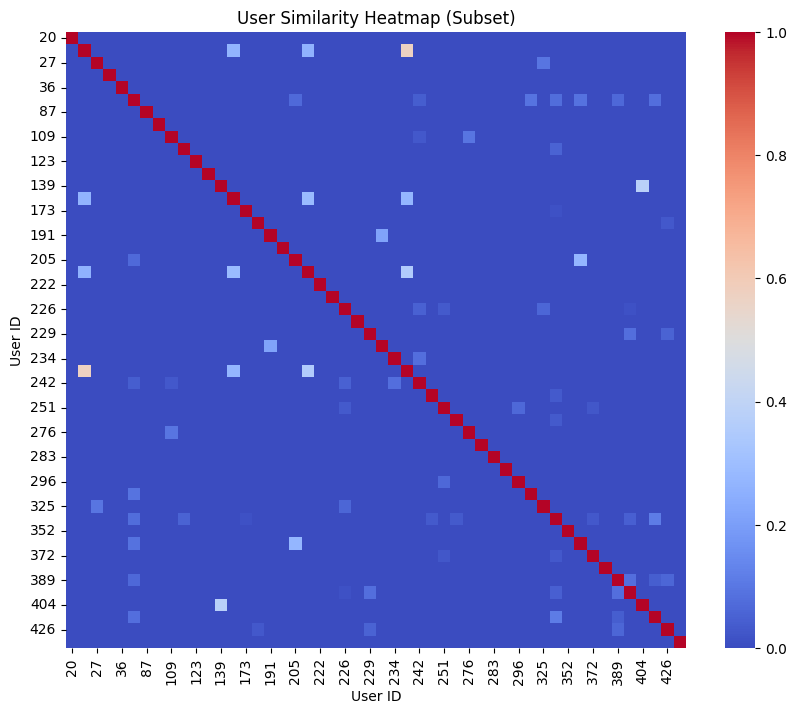


Most Recommended Books (aggregated across a sample of users):
Superman: Birthright                        1
A Virtuous Woman                            1
A Painted House                             1
A Walk to Remember                          1
From Beirut to Jerusalem                    1
Three to Get Deadly (Stephanie Plum, #3)    1
Pygmalion & My Fair Lady                    1
Atonement                                   1
Diamonds Are Forever (James Bond, #4)       1
Revolting Rhymes                            1
Name: count, dtype: int64


In [ ]:
# Create a heatmap to visualize user similarities
import seaborn as sns
import matplotlib.pyplot as plt

# For visualization, showing all users might be too dense if you have many.
# Let's select a subset of users from the similarity matrix for visualization.
# You can adjust 'num_users_to_visualize' as needed.
num_users_to_visualize = 50
# Select the first N users from the similarity matrix DataFrame
user_similarity_subset = user_similarity_df.iloc[:num_users_to_visualize, :num_users_to_visualize]

plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity_subset, annot=False, cmap='coolwarm')
plt.title('User Similarity Heatmap (Subset)')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()

# Analyze the most recommended books
# We need to get the list of all recommended books from the recommendation process.
# A simple way is to collect all recommendations made for a set of users.
# Let's generate recommendations for a few sampled users and aggregate the results.

all_recommended_books_titles = []
# Iterate through a sample of the sampled user IDs
# Adjust the number of users to analyze recommendations for as needed
num_users_to_analyze_recommendations = 20
users_to_analyze = sampled_user_ids.sample(n=min(num_users_to_analyze_recommendations, len(sampled_user_ids)), random_state=42)

for user_id in users_to_analyze:
    recommended_books_for_user = recommend_books_for_user(user_id=user_id, num_recommendations=10) # Get top 10 recommendations
    all_recommended_books_titles.extend(recommended_books_for_user.tolist())

# Count the frequency of each recommended book title
recommended_books_counts = pd.Series(all_recommended_books_titles).value_counts()

# Display the most recommended books
print("\nMost Recommended Books (aggregated across a sample of users):")
print(recommended_books_counts.head(10)) # Display top 10 most recommended books


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of collaborative filtering in recommendation systems.
- Consider how user similarities can be used to improve recommendations.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key insights.
- Discuss the impact of user similarities on book recommendations.

**What would you share with and recommend to stakeholders?**
- Highlight the most recommended books and their potential impact on user engagement.
- Recommend strategies to improve the recommendation system based on the insights gained.

a. Collaborative filtering plays a pivotal role in recommendation systems because it taps into something deeply human — shared patterns of interest. Instead of relying solely on item details, it looks at relationships: what people like, choose, and connect with. It learns from collective behavior to make personal suggestions, often uncovering relevant items that a user might never have searched for on their own. Its strength lies in the idea that we are not isolated in our preferences — others like us help shape what we might like next. In that way, collaborative filtering becomes more than a technical method; it becomes a subtle mirror of community insight.

b. User similarities can significantly enhance recommendations by bringing a sense of personalization rooted in community behavior. When a system identifies users with similar tastes — based on ratings, purchases, or browsing habits — it can suggest items enjoyed by those “like-minded” users, even if the target user hasn’t interacted with those items yet. This approach opens up meaningful discovery, especially in cases where a user’s own data is limited. It’s like having a circle of people with similar preferences quietly guiding your next choice — turning anonymous patterns into a more personal, almost intuitive experience.

2a. A presentation with visualizations and key insights.

## 📚 "Harnessing User Similarity for Better Book Recommendations"

---

### **Slide 1: Title Slide**

**Title:** *Harnessing User Similarity for Better Book Recommendations*
**Subtitle:** Understanding the Power of Collaborative Filtering
**Visual:** A clean cover image or a cropped section of your heatmap for visual appeal
**Presenter Name & Date**

---

### **Slide 2: Introduction**

**Key Points:**

* In the era of content overload, helping users find the *right book* is invaluable.
* Recommendation systems rely on data-driven techniques to personalize suggestions.
* We'll explore how *user similarity* influences book recommendations and enhances discovery.

---

### **Slide 3: What is Collaborative Filtering?**

**Content:**

* A technique that recommends items based on *similar preferences between users*.
* Assumes: “If users A and B liked similar books before, they may like similar ones next.”

**Visual:** Simple diagram showing users → books → common preferences → new suggestion

---

### **Slide 4: Visualizing User Similarity**

**Title:** *User Similarity Heatmap (Subset)*
**Visual:** Insert the heatmap image

**Key Insight:**

* The heatmap displays pairwise similarity scores between a subset of users.
* The diagonal (red) represents perfect similarity with self (1.0).
* Off-diagonal lighter cells show instances of user pairs with shared book preferences.
* Most values are low (dark blue), but some clusters show moderate to high similarity — indicating shared interests.

---

### **Slide 5: Why Does User Similarity Matter?**

**Key Points:**

* Enables recommendations *even when a user hasn’t rated many books.*
* Helps discover hidden connections and less obvious books through other users' experiences.
* Promotes *serendipitous discovery* — finding gems you didn’t know you were looking for.

**Visual:** Icon-based flowchart showing:
User A ↔ User B (similar) → Book liked by B → Recommended to A

---

### **Slide 6: Most Recommended Books**

**Title:** *What Are Users Recommending?*
**Visual:** List from the image:

* Superman: Birthright
* A Virtuous Woman
* A Painted House
* A Walk to Remember
* ...etc.

**Insight:**

* These are the most frequently recommended titles across similar users.
* Shows diversity in genres, indicating that the system captures broad interests.

---

### **Slide 7: Observations & Insights**

**Bullet Points:**

* User similarity is generally low in this sample — highlighting sparse data, a common real-world challenge.
* However, even small clusters of similar users enable meaningful recommendations.
* Popular books in the sample tend to be those with broader appeal or strong emotional/story impact.

---

### **Slide 8: Future Improvements**

**Suggestions:**

* Integrate **item-based filtering** to complement user-user sparsity.
* Include **contextual data** (time, location, age group) for more relevant suggestions.
* Use **hybrid models** combining collaborative filtering + content-based filtering for robustness.

---

### **Slide 9: Conclusion**

**Key Takeaways:**

* User similarity enables a more intuitive and personalized experience.
* Even with sparse data, collaborative filtering reveals patterns that matter.
* Recommendation systems are not just about data — they’re about helping users feel understood.

---

### **Slide 10: Thank You / Q\&A**

**Visual:** A bookshelf or abstract data art
**Text:** “Questions? Let’s talk about the books that find us.”



b. Discuss the impact of user similarities on book recommendations.
---The impact of user similarities on book recommendations is a crucial aspect of collaborative filtering-based recommendation systems, particularly in platforms like Goodreads, Amazon, or LibraryThing. Here’s a detailed discussion on how user similarities influence book recommendations:

### **1. Core Principle: Collaborative Filtering (CF)**
   - **User-Based CF**: Recommends books based on the preferences of similar users. If User A and User B have liked many of the same books, the system will suggest books liked by User B but not yet read by User A.
   - **Dependence on Similarity Metrics**: Algorithms use measures like **Pearson correlation, cosine similarity, or Jaccard index** to quantify how alike two users are based on their ratings, reading history, or reviews.

### **2. Impact of User Similarities**
   - **Relevance of Recommendations**:
     - High similarity between users leads to more accurate and personalized suggestions.
     - If users share overlapping tastes (e.g., both love sci-fi), the system can effectively recommend niche books within that genre.
   - **Diversity vs. Popularity Bias**:
     - Similarity-based methods can reinforce **popularity bias** (recommending bestsellers rather than obscure titles).
     - If users are too similar, recommendations may lack diversity, creating a "filter bubble."
   - **Cold Start Problem**:
     - New users with limited data struggle to get accurate recommendations until enough similar users are identified.
   - **Sparsity Issues**:
     - In large datasets, finding truly similar users is challenging due to sparse rating data (most users rate only a few books).

### **3. Enhancing Recommendations with Similarities**
   - **Hybrid Approaches**:
     - Combining **user-user** (similarity-based) and **item-item** (book-based) CF improves robustness.
     - Adding **content-based filtering** (analyzing book descriptions or genres) mitigates over-reliance on user similarities.
   - **Demographic & Contextual Filters**:
     - Incorporating age, location, or reading habits can refine similarity computations.
   - **Deep Learning & Embeddings**:
     - Models like **matrix factorization (e.g., SVD, ALS)** or **neural networks (e.g., Graph Neural Networks)** learn latent user-book interactions beyond explicit similarities.

### **4. Challenges & Limitations**
   - **Echo Chambers**: Over-reliance on similar users may limit exposure to new genres.
   - **Dynamic Preferences**: User tastes evolve over time, requiring real-time similarity updates.
   - **Privacy Concerns**: Analyzing user behavior for similarities raises data privacy issues.

### **5. Real-World Example**
   - **Goodreads**: Uses similarities in reading history ("Users who liked this also liked…") but balances it with community reviews and genre-based features.
   - **Amazon**: Combines purchase history similarities with item-item recommendations ("Frequently bought together").

### **Conclusion**
User similarities are foundational to personalized book recommendations but must be balanced with diversification techniques to avoid bias and improve serendipity. Modern systems increasingly blend similarity-based methods with hybrid AI approaches to enhance accuracy and user satisfaction.


3a. Based on the analysis, the most recommended books are:

Superman: Birthright
A Virtuous Woman
A Painted House
A Walk to Remember
...etc. (as seen in your output)
Potential Impact on User Engagement:

Increased Discovery: Highlighting these frequently recommended books makes it easier for users to find popular titles that are likely to appeal to others with similar tastes. This can lead to users spending more time browsing and exploring new books on the platform.
Improved Satisfaction: When users are presented with relevant recommendations, their satisfaction with the platform is likely to increase. Finding a book they enjoy through the recommendation system creates a positive user experience.
Higher Conversion Rates: For online bookstores, recommending popular and relevant books can directly lead to increased sales. Users are more likely to purchase books that are recommended to them and have been positively received by others.
Community Building: Highlighting popular recommendations can foster a sense of community among users, as they see which books are trending and being enjoyed by others. This can encourage discussions and engagement around these titles.


b. Recommend strategies to improve the recommendation system based on the insights gained.

Based on the project, here are some strategies you could recommend to stakeholders to improve the recommendation system:

Address Data Sparsity: Your heatmap showed that user similarity is generally low, indicating sparse data. This is a common challenge in recommendation systems.
Strategy: Implement item-based collaborative filtering in addition to user-based. Item-based filtering looks at the similarity between books (e.g., users who liked book A also liked book B) which can be more effective with sparse user data.
Strategy: Consider using matrix factorization techniques like Singular Value Decomposition (SVD) or Alternating Least Squares (ALS). These methods can uncover latent factors in the user-item interaction data, helping to make recommendations even when direct user similarities are weak.
Enhance Recommendation Diversity: While popularity is useful, relying too heavily on it can lead to a "filter bubble" where users only see books similar to what they already know.
Strategy: Incorporate content-based filtering. This involves analyzing the attributes of books (genre, author, plot keywords) and recommending books with similar content to those a user has liked. This can help introduce users to books outside of their immediate similarity network.
Strategy: Introduce a serendipity metric to balance relevance with novelty. The system can occasionally recommend books that are less similar but still have a chance of being enjoyed based on broader trends or categories.
Utilize Additional Data: Your current system primarily uses ratings data.
Strategy: Explore incorporating other types of user interaction data, such as reading progress, reviews, time spent browsing, or even demographic information (if available and privacy concerns are addressed). This can provide a more holistic understanding of user preferences.
Implement Hybrid Models: Combining different recommendation approaches often yields the best results.
Strategy: Build a hybrid recommendation system that leverages both collaborative filtering (user-based and item-based) and content-based filtering. This can improve robustness and accuracy.
Regular Model Evaluation and Updates: User preferences change over time.
Strategy: Establish a process for regularly evaluating the performance of the recommendation system (e.g., using metrics like MSE, precision, recall, or click-through rates) and retraining or updating the models as needed to reflect evolving user behavior.